<a href="https://colab.research.google.com/github/kwangyoulsagong/Computer_Vision_Lab/blob/main/%E1%84%8F%E1%85%A5%E1%86%B7%E1%84%91%E1%85%B2%E1%84%90%E1%85%A5%E1%84%87%E1%85%B5%E1%84%8C%E1%85%A5%E1%86%AB_Assignment_2_201901565_%EC%82%AC%EA%B3%B5%EA%B4%91%EC%97%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Computer Vision] Assignment #2

본 과제의 목적은 k-means clsutering 구현을 목표로 함.

* k-means clustering은 비지도학습의 한 종류로써, 사전에 정의된 클러스터 갯수 K와 초기값에 의해 데이터의 cluster 할당을 반복적으로 업데이트하는 알고리즘임.
* k-means clsutering 을 from scratch 로 구현하고, scikit-learn 의 결과와 비교함.
* 구현에 필요한 코드, 패키지, 파라미터, 함수 등을 skeleton code에 추가하여 사용 가능함.
* max_iterations 변화에 따른 clsutering 결과 양상 변화 확인
* tolerance 변화에 따른 clustering 결과 양상 변화 확인

## 1. K-means clustering from scratch (40 points)

In [8]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math

class K_Means:
    def __init__(self, k=2, tolerance=0.001, max_iterations=500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations

    def euclidean_distance(self, point1, point2):
        return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

    def fit(self, data):
        self.cluster_centers = [data[rd.randint(0, len(data) - 1)] for _ in range(self.k)]

        for i in range(self.max_iterations):
            clusters = [[] for _ in range(self.k)]
            for point in data:
                distances = [self.euclidean_distance(point, center) for center in self.cluster_centers]
                cluster_index = distances.index(min(distances))
                clusters[cluster_index].append(point)

            new_centers = [np.mean(cluster, axis=0) if cluster else self.cluster_centers[j] for j, cluster in enumerate(clusters)]

            if all(self.euclidean_distance(new_centers[j], self.cluster_centers[j]) < self.tolerance for j in range(self.k)):
                break
            else:
                self.cluster_centers = new_centers
                self.labels = [np.argmin([self.euclidean_distance(point, center) for center in self.cluster_centers]) for point in data]



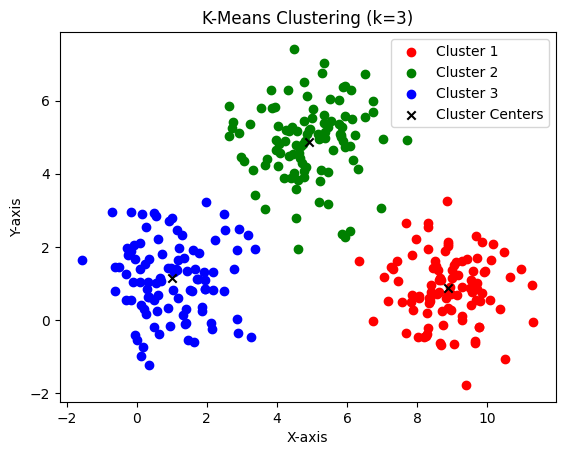

In [13]:
# 클러스터 수 (k) 및 클러스터 중심 초기화
k = 3
center_1 = (1, 1)
center_2 = (9, 1)
center_3 = (5, 5)

# 설정한 중심으로 Gaussian 분포를 따르는 데이터 생성
np.random.seed(0)
cluster_1 = center_1 + np.random.randn(100, 2)
cluster_2 = center_2 + np.random.randn(100, 2)
cluster_3 = center_3 + np.random.randn(100, 2)

# 생성한 데이터를 모두 합쳐서 하나의 형태로 변형
data = np.vstack((cluster_1, cluster_2, cluster_3))

# K-Means 알고리즘 적용
k_means = K_Means(k)
k_means.fit(data)

# 클러스터링 결과 시각화
colors = ['r', 'g', 'b']
for i in range(k):
    plt.scatter(*zip(*data[np.array(k_means.labels) == i]), c=colors[i], label=f'Cluster {i+1}')
plt.scatter(*zip(*k_means.cluster_centers), c='black', marker='x', label='Cluster Centers')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'K-Means Clustering (k={k})')
plt.show()


## 2. K-means clustering with scikit-learn (10 points)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


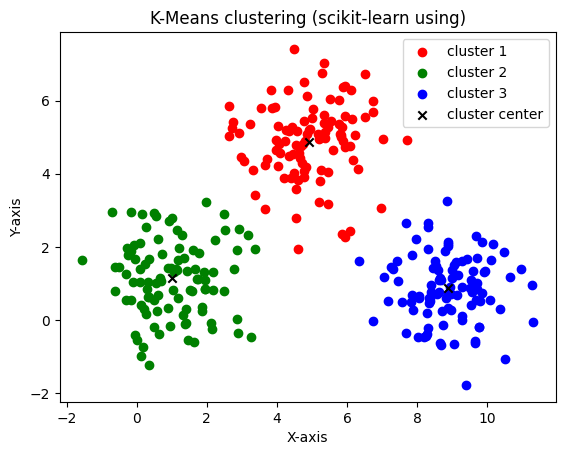

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# scikit-learn의 K-Means 모델을 사용합니다.
kmeans = KMeans(n_clusters=3)  # 클러스터 수(k)를 지정합니다.
kmeans.fit(data)  # K-Means 모델을 데이터에 맞춥니다.

# 클러스터 중심과 레이블을 얻습니다.
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# K-Means 클러스터링 결과 시각화
colors = ['r', 'g', 'b']
for i in range(3):
    plt.scatter(*zip(*data[np.array(labels) == i]), c=colors[i], label=f'cluster {i+1}')
plt.scatter(*zip(*cluster_centers), c='black', marker='x', label='cluster center')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-Means clustering (scikit-learn using)')
plt.show()
